<a href="https://colab.research.google.com/github/sirajshaik2003/CODEWAY/blob/main/CREDIT_CARD_FRAUD_DETECTION_(Codeway_Task_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

**Load the Dataset**

In [ ]:
df = pd.read_csv("/content/fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


**Exploratory Data Analysis**

In [ ]:
df.shape

(879597, 23)

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,879597.000000,8.795970e+05,879597.000000,879597.000000,879597.000000,879597.000000,8.795970e+05,8.795960e+05,879596.000000,879596.000000,879596.000000
mean,439798.000000,4.167092e+17,70.294818,48796.435206,38.533459,-90.225700,8.901207e+04,1.342167e+09,38.533251,-90.225723,0.005672
std,253917.926702,1.308298e+18,162.715608,26901.339985,5.075631,13.766512,3.023075e+05,8.745317e+06,5.109928,13.778584,0.075098
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.027785,-166.671242,0.000000
25%,219899.000000,1.800400e+14,9.640000,26237.000000,34.668900,-96.798000,7.430000e+02,1.335031e+09,34.735309,-96.899902,0.000000
50%,439798.000000,3.520550e+15,47.430000,48174.000000,39.354300,-87.476900,2.456000e+03,1.342322e+09,39.363647,-87.435015,0.000000
75%,659697.000000,4.642255e+15,83.060000,72011.000000,41.894800,-80.158000,2.047800e+04,1.349634e+09,41.952134,-80.228399,0.000000
max,879596.000000,4.992346e+18,28948.900000,99783.000000,66.693300,-67.950300,2.906700e+06,1.356158e+09,67.510267,-66.956540,1.000000


In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
df.duplicated().sum()

0

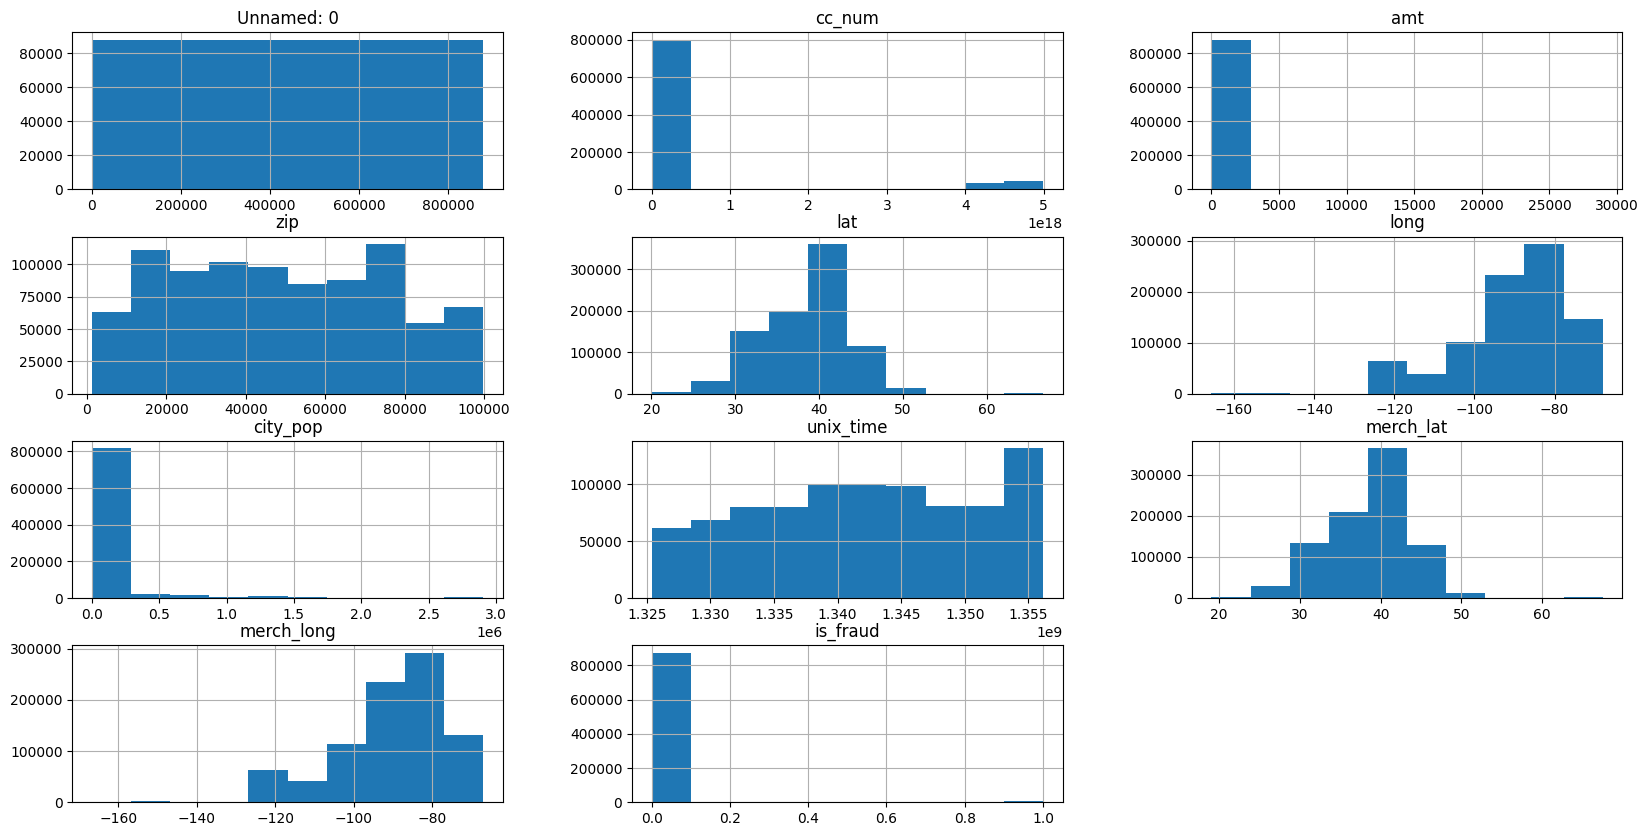

In [ ]:
# Plot the histogram of each feature
df.hist(figsize=(20,10))
plt.show()

<ipython-input-9-17da7a57bdb7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


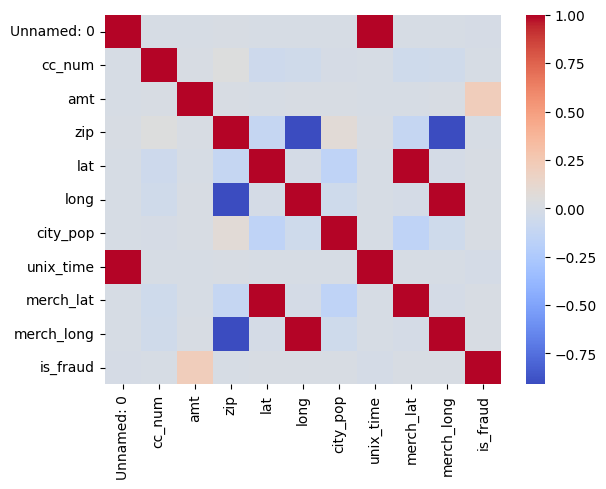

In [ ]:
# Plot the correlation matrix of the features
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm")
plt.show()

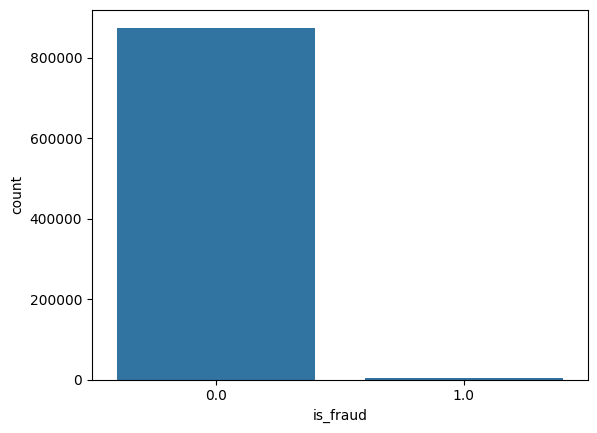

In [ ]:
# Plot the distribution of the class label
sns.countplot(x="is_fraud", data=df)
plt.show()

**Split the data into training and testing sets**

In [ ]:
le = LabelEncoder()
df.drop(df.columns[0], axis=1, inplace=True)
features = df.columns
for i in features:
  if df[i].dtype=='object':
    df[i] = le.fit_transform(df[i])
    df.fillna(method='ffill',inplace=True)

In [ ]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

*Logistic Regression*

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print("ROC AUC score:", roc_auc_score(y_test, y_pred_log_reg))
print()

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    174880
         1.0       0.00      0.00      0.00      1040

    accuracy                           0.99    175920
   macro avg       0.50      0.50      0.50    175920
weighted avg       0.99      0.99      0.99    175920

ROC AUC score: 0.49974268069533395



*Decision Tree*

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree:")
print(classification_report(y_test, y_pred_dtree))
print("ROC AUC score:", roc_auc_score(y_test, y_pred_dtree))
print()

Decision Tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    174880
         1.0       0.69      0.70      0.70      1040

    accuracy                           1.00    175920
   macro avg       0.85      0.85      0.85    175920
weighted avg       1.00      1.00      1.00    175920

ROC AUC score: 0.8509910092195089



*Random Forest*

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC score:", roc_auc_score(y_test, y_pred_rf))
print()

Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    174880
         1.0       0.94      0.62      0.75      1040

    accuracy                           1.00    175920
   macro avg       0.97      0.81      0.87    175920
weighted avg       1.00      1.00      1.00    175920

ROC AUC score: 0.8118934302202829



**Model Evaluation**

The Random Forest model has the best performance among the three models, as it has the highest precision, recall, f1-score, and roc_auc_score for the positive class (fraudulent transactions).